In [1]:
import mysql.connector

In [2]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [3]:
# sql = """
# create table gdp (
#     date date,
#     k_gdp float,
#     usa_gdp float
# )
# """

# cur = remote.cursor()
# cur.execute(sql)

# remote.close()

In [4]:
import pandas as pd

In [5]:
interest_rate_addr = "../data/GDP 성장률.xlsx"
df = pd.read_excel(interest_rate_addr, header=6, usecols="A,B")
interest_rate_addr2 = "../data/미국 경제성장률과 인플레이션율.xlsx"
df2 = pd.read_excel(interest_rate_addr2, header=6, usecols="A,B")

df.rename(columns={df.columns[0]:"date",
                   df.columns[1]:"k_gdp"},
                   inplace=True)

df2.rename(columns={df2.columns[0]:"date",
                   df2.columns[1]:"usa_gdp"},
                   inplace=True)

merge_df = pd.merge(df, df2, on="date")
merge_df.set_index(merge_df.columns[0], inplace=True)
merge_df.head()

,k_gdp,usa_gdp
date,,
2000-Q2,1.5,7.5
2000-Q3,2.7,0.4
2000-Q4,-0.3,2.4
2001-Q1,1.0,-1.3
2001-Q2,1.5,2.5


In [6]:
# df.loc["20190901":]
corona_interval = merge_df["2004-09":]
corona_interval.head()

,k_gdp,usa_gdp
date,,
2004-Q1,1.4,2.3
2004-Q2,0.8,3.1
2004-Q3,0.3,3.8
2004-Q4,0.8,4.1
2005-Q1,0.9,4.5


In [7]:
import numpy as np

In [8]:
monthly = []

for index, row in corona_interval.iterrows():
    # print(index, row["k_interest_rate"], row["usa_interest_rate"])
    # print(now_month)
    month_info = []

    branch = ""

    if str(index[-2:]) == "Q1":
        branch = "03"
    elif str(index[-2:]) == "Q2":
        branch = "06"
    elif str(index[-2:]) == "Q3":
        branch = "09"
    elif str(index[-2:]) == "Q4":
        branch = "12"
    month_info.append(index[:-2] + branch + str("-01"))
    month_info.append(float(row["k_gdp"]))
    month_info.append(float(row["usa_gdp"]))

    monthly.append(month_info)

monthly

[['2004-03-01', 1.4, 2.3],
 ['2004-06-01', 0.8, 3.1],
 ['2004-09-01', 0.3, 3.8],
 ['2004-12-01', 0.8, 4.1],
 ['2005-03-01', 0.9, 4.5],
 ['2005-06-01', 1.9, 2.0],
 ['2005-09-01', 1.4, 3.2],
 ['2005-12-01', 1.1, 2.2],
 ['2006-03-01', 1.6, 5.5],
 ['2006-06-01', 0.7, 1.0],
 ['2006-09-01', 1.6, 0.6],
 ['2006-12-01', 0.8, 3.5],
 ['2007-03-01', 1.8, 1.2],
 ['2007-06-01', 1.7, 2.5],
 ['2007-09-01', 1.2, 2.3],
 ['2007-12-01', 2.0, 2.5],
 ['2008-03-01', 0.8, -1.7],
 ['2008-06-01', 0.4, 2.4],
 ['2008-09-01', 0.7, -2.1],
 ['2008-12-01', -3.4, -8.5],
 ['2009-03-01', 0.3, -4.5],
 ['2009-06-01', 1.4, -0.7],
 ['2009-09-01', 3.1, 1.4],
 ['2009-12-01', 0.7, 4.4],
 ['2010-03-01', 2.3, 1.9],
 ['2010-06-01', 1.6, 3.9],
 ['2010-09-01', 1.0, 3.1],
 ['2010-12-01', 1.4, 2.1],
 ['2011-03-01', 1.0, -0.9],
 ['2011-06-01', 0.4, 2.7],
 ['2011-09-01', 0.5, -0.1],
 ['2011-12-01', 0.7, 4.6],
 ['2012-03-01', 1.0, 3.4],
 ['2012-06-01', 0.4, 1.8],
 ['2012-09-01', 0.4, 0.6],
 ['2012-12-01', 0.7, 0.5],
 ['2013-03-01', 0.8,

In [9]:
monthly_df = pd.DataFrame(monthly, columns=["date", "k_gdp", "usa_gdp"])
# monthly_df.tail()
monthly_df.set_index("date", inplace=True)
monthly_df.tail()

,k_gdp,usa_gdp
date,,
2023-06-01,0.6,2.4
2023-09-01,0.8,4.4
2023-12-01,0.5,3.2
2024-03-01,1.3,1.6
2024-06-01,-0.2,3.0


In [10]:
monthly_df.head()

,k_gdp,usa_gdp
date,,
2004-03-01,1.4,2.3
2004-06-01,0.8,3.1
2004-09-01,0.3,3.8
2004-12-01,0.8,4.1
2005-03-01,0.9,4.5


In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
from matplotlib import dates
import matplotlib.dates as mdates
import datetime

In [12]:
temp = list(monthly_df.index)
len(temp)
np.arange(0, len(temp), 12)

array([ 0, 12, 24, 36, 48, 60, 72])

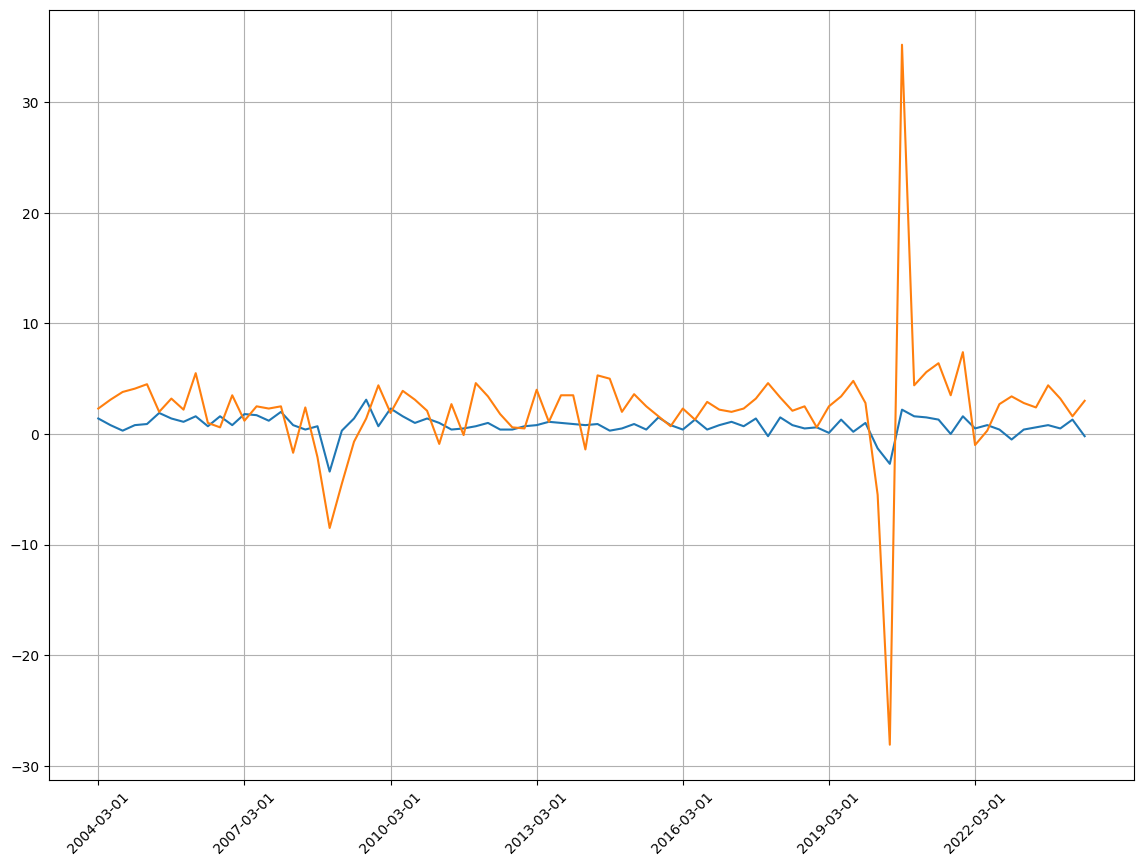

In [13]:
plt.figure(figsize=(14,10))
plt.plot(monthly_df)
plt.xticks(np.arange(0, len(temp), 12), rotation=45)
plt.grid()
plt.show()

In [14]:
import mysql.connector

In [15]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [16]:
cur = remote.cursor()

sql = open("../sql_script/insert_gdp.sql").read()
for index, row in monthly_df.iterrows():
    temp = [index, float(row["k_gdp"]), float(row["usa_gdp"])]
    print(temp)
    cur.execute(sql, tuple(temp))
    remote.commit()

cur.execute("select * from gdp")
result = cur.fetchall()
for row in result:
    print(row)

['2004-03-01', 1.4, 2.3]
['2004-06-01', 0.8, 3.1]
['2004-09-01', 0.3, 3.8]
['2004-12-01', 0.8, 4.1]
['2005-03-01', 0.9, 4.5]
['2005-06-01', 1.9, 2.0]
['2005-09-01', 1.4, 3.2]
['2005-12-01', 1.1, 2.2]
['2006-03-01', 1.6, 5.5]
['2006-06-01', 0.7, 1.0]
['2006-09-01', 1.6, 0.6]
['2006-12-01', 0.8, 3.5]
['2007-03-01', 1.8, 1.2]
['2007-06-01', 1.7, 2.5]
['2007-09-01', 1.2, 2.3]
['2007-12-01', 2.0, 2.5]
['2008-03-01', 0.8, -1.7]
['2008-06-01', 0.4, 2.4]
['2008-09-01', 0.7, -2.1]
['2008-12-01', -3.4, -8.5]
['2009-03-01', 0.3, -4.5]
['2009-06-01', 1.4, -0.7]
['2009-09-01', 3.1, 1.4]
['2009-12-01', 0.7, 4.4]
['2010-03-01', 2.3, 1.9]
['2010-06-01', 1.6, 3.9]
['2010-09-01', 1.0, 3.1]
['2010-12-01', 1.4, 2.1]
['2011-03-01', 1.0, -0.9]
['2011-06-01', 0.4, 2.7]
['2011-09-01', 0.5, -0.1]
['2011-12-01', 0.7, 4.6]
['2012-03-01', 1.0, 3.4]
['2012-06-01', 0.4, 1.8]
['2012-09-01', 0.4, 0.6]
['2012-12-01', 0.7, 0.5]
['2013-03-01', 0.8, 4.0]
['2013-06-01', 1.1, 1.1]
['2013-09-01', 1.0, 3.5]
['2013-12-01', 0.

In [17]:
remote.close()